<a href="https://colab.research.google.com/github/datvodinh10/project-DD/blob/master/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import

In [1]:
import torch

In [2]:
from src.model.trainer import Trainer

c:\Users\vodin\.conda\envs\pytorchenv\lib\site-packages\torchvision\io\image.py:11: UserWarning: Failed to load image Python extension: Could not find module 'C:\Users\vodin\.conda\envs\pytorchenv\Lib\site-packages\torchvision\image.pyd' (or one of its dependencies). Try using the full path with constructor syntax.
  warn(f"Failed to load image Python extension: {e}")


## Train

In [3]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

In [4]:
config = {
    'transformer':{
        'embed_size': 384,      # model's hidden size
        'num_heads':6,          # number of heads in MSA
        'num_layers':2,         # number of encoder/decoder layer
        'max_len': 10_000,      # max sequence length
        'dropout':0.2,          # dropout rate
        'bias':False,           # attention bias
        'embed_type': 'learned' # {'position','learned'}

    },
    'encoder':{
        'type': 'swin_transformer', # {'resnet18','resnet50,'vgg','swin_transformer','vision_transformer'}
        
        'ViT':{
            'patch_size': 16,
        },
        
        'swin':{
            'img_size':(64,128),
            'embed_dim':48,
            'window_size':8
        },
    },
    
    'device':device,
    'lr':1e-4,
    'batch_size':25,
    'num_epochs':500,
    'preprocessing': 'none'
}

In [5]:
trainer = Trainer(config      = config,
                  IMAGE_PATH  = "C:/Users/vodin/project-DD/preprocess",
                  TARGET_PATH = "C:/Users/vodin/Downloads/train_gt.txt")

c:\Users\vodin\.conda\envs\pytorchenv\lib\site-packages\torch\functional.py:445: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  ..\aten\src\ATen\native\TensorShape.cpp:2157.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


In [6]:
def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)

print(f'Total parameters: {count_parameters(trainer.model)}')

Total parameters: 23384864


In [7]:
trainer.train()

| Epoch 0 | Batch 0/8 | Loss: 5.3049
| Epoch 0 | Batch 1/8 | Loss: 4.7737
| Epoch 0 | Batch 2/8 | Loss: 4.3627
| Epoch 0 | Batch 3/8 | Loss: 4.3957
| Epoch 0 | Batch 4/8 | Loss: 4.3133
| Epoch 0 | Batch 5/8 | Loss: 4.2860
| Epoch 0 | Batch 6/8 | Loss: 4.3220
| Epoch 0 | Batch 7/8 | Loss: 4.1845
| Epoch 1 | Batch 0/8 | Loss: 4.1497
| Epoch 1 | Batch 1/8 | Loss: 4.1093
| Epoch 1 | Batch 2/8 | Loss: 4.1744
| Epoch 1 | Batch 3/8 | Loss: 4.1261
| Epoch 1 | Batch 4/8 | Loss: 4.0748
| Epoch 1 | Batch 5/8 | Loss: 4.1383
| Epoch 1 | Batch 6/8 | Loss: 4.2266
| Epoch 1 | Batch 7/8 | Loss: 4.0496
| Epoch 2 | Batch 0/8 | Loss: 4.0096
| Epoch 2 | Batch 1/8 | Loss: 4.0348
| Epoch 2 | Batch 2/8 | Loss: 4.0170
| Epoch 2 | Batch 3/8 | Loss: 4.0595
| Epoch 2 | Batch 4/8 | Loss: 4.1000
| Epoch 2 | Batch 5/8 | Loss: 3.9879
| Epoch 2 | Batch 6/8 | Loss: 4.0334
| Epoch 2 | Batch 7/8 | Loss: 4.0492
| Epoch 3 | Batch 0/8 | Loss: 3.9672
| Epoch 3 | Batch 1/8 | Loss: 3.9441
| Epoch 3 | Batch 2/8 | Loss: 4.0541
|

In [8]:
save_dict = {
    'state_dict':trainer.model.state_dict(),
    'config':config,
    'vocab_size':trainer.vocabulary.vocab_size
}
file_path = 'model.pth'
torch.save(save_dict, file_path)

## Predict

In [9]:
from src.utils.inference import Inference
from src.utils.transform import Transform
from PIL import Image
import os
import torch
import matplotlib.pyplot as plt

In [10]:
infer = Inference(DATA_PATH   = 'model.pth',
                  TARGET_PATH = "C:/Users/vodin/Downloads/train_gt.txt")

In [11]:
T = Transform('none')

In [12]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

In [92]:
idx = torch.randint(200,())
img = Image.open(os.path.join("C:/Users/vodin/project-DD/preprocess",os.listdir("C:/Users/vodin/project-DD/preprocess")[idx]))
infer.predict(T(img).unsqueeze(0).to(device))

'Sching'

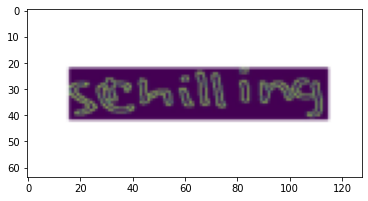

In [93]:
plt.imshow(T(img).permute(1,2,0))